# Relax Take Home Challenege
The data is available as two attached CSV files:

takehome_user_engagement.csv

takehome_users.csv

The data has the following two tables:

1] A user table ("takehome_users") with data on 12,000 users who signed up for the product in the last two years. 

This table includes:

● name: the user's name

● object_id: the user's id

● email: email address

● creation_source: how their account was created. This takes on one
of 5 values:

    ○ PERSONAL_PROJECTS: invited to join another user's personal workspace

    ○ GUEST_INVITE: invited to an organization as a guest (limited permissions)

    ○ ORG_INVITE: invited to an organization (as a full member)

    ○ SIGNUP: signed up via the website

    ○ SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login id)

● creation_time: when they created their account

● last_session_creation_time: unix timestamp of last login

● opted_in_to_mailing_list: whether they have opted into receiving
marketing emails

● enabled_for_marketing_drip: whether they are on the regular
marketing email drip

● org_id: the organization (group of users) they belong to

● invited_by_user_id: which user invited them to join (if applicable).

2] A usage summary table ("takehome_user_engagement") that has a row for each day that a user logged into the product.

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period, identify which factors predict future user adoption.
We suggest spending 1-2 hours on this, but you're welcome to spend more or less. Please send us a brief writeup of your findings (the more concise, the better -- no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# read data into pandas
users = pd.read_csv('takehome_users.csv', encoding = "ISO-8859-1")
engagement = pd.read_csv('takehome_user_engagement.csv')

In [3]:
# check out users data frame to see what it looks like
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
# check out engagement data frame
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
# print summary statistics
users.info()
users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [6]:
# print summary statistics
engagement.info()
engagement.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [7]:
# set time_stamp to datetime data type
engagement.time_stamp = pd.to_datetime(engagement.time_stamp)

In [8]:
# group by user id, then resample into weekly buckets and count the number of logins.
buckets = engagement.groupby('user_id').resample(rule='W', on='time_stamp').count()

In [9]:
# drop extra columns, rename remaining column to count
buckets.drop('visited', axis=1, inplace=True)
buckets.drop('time_stamp', axis=1, inplace=True)
buckets.columns = ['count']

In [10]:
# create list of customers who adopted the system
adopted = np.unique(buckets.loc[buckets['count'] > 2].index.get_level_values(0).values)

In [11]:
# add adtoped column to users data frame
users['adopted'] = users['object_id'].apply(lambda x: 1 if x in adopted else 0)

In [12]:
# list of columns to group by and plot
group_by_cols = ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']

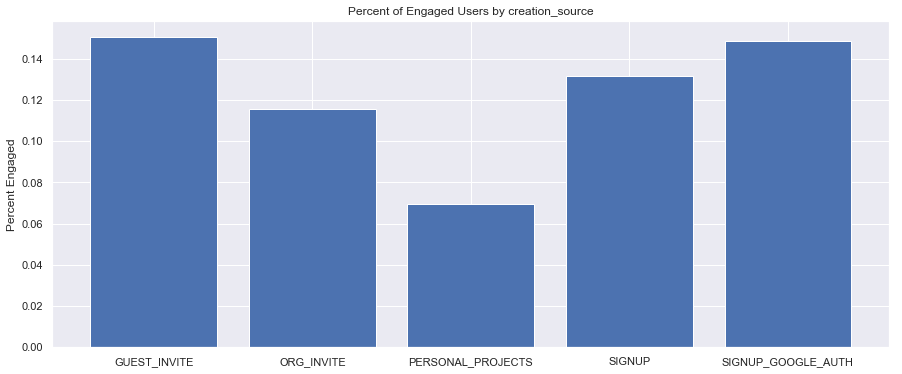

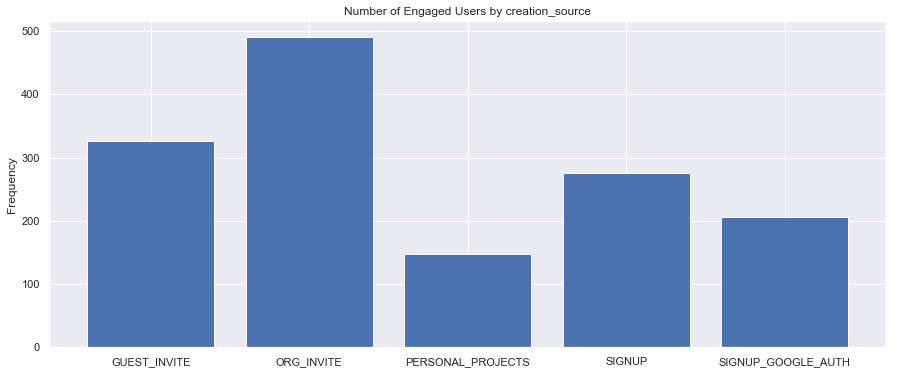

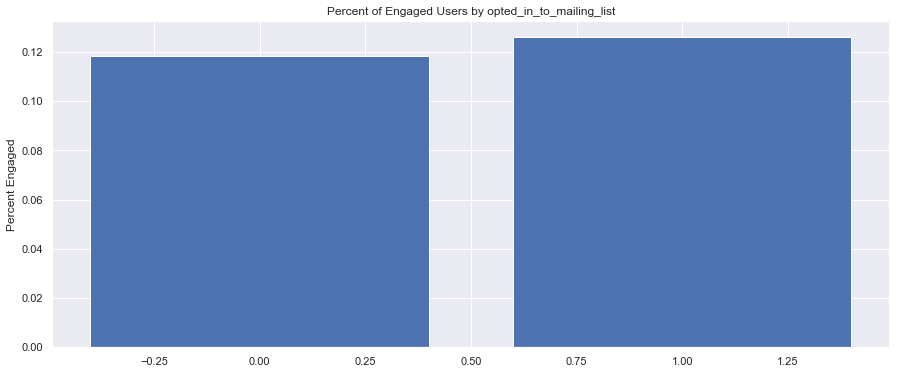

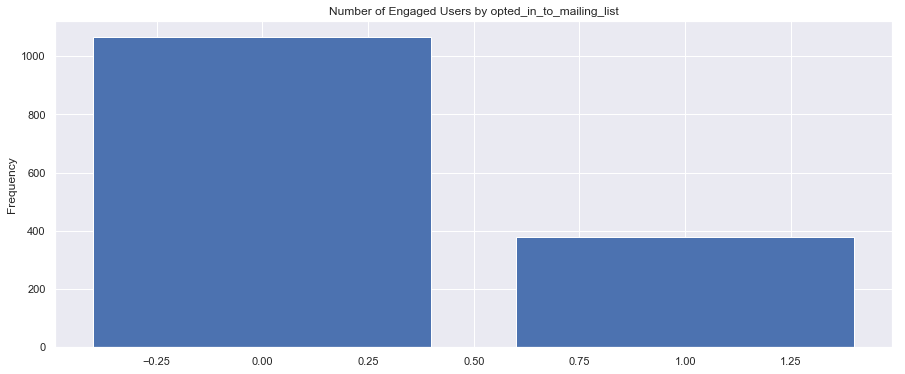

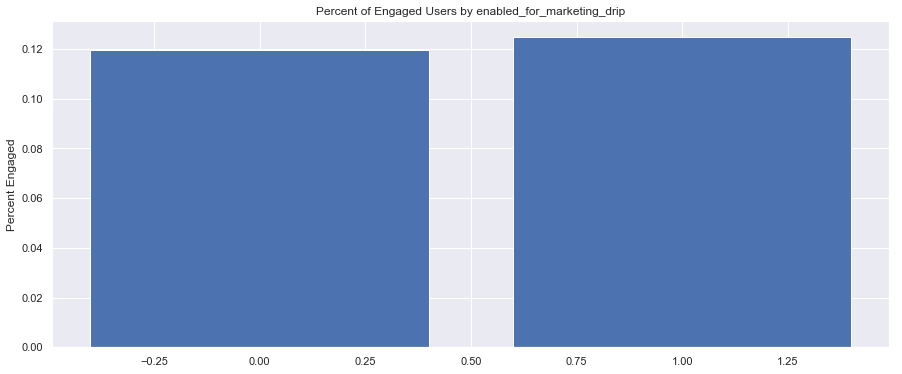

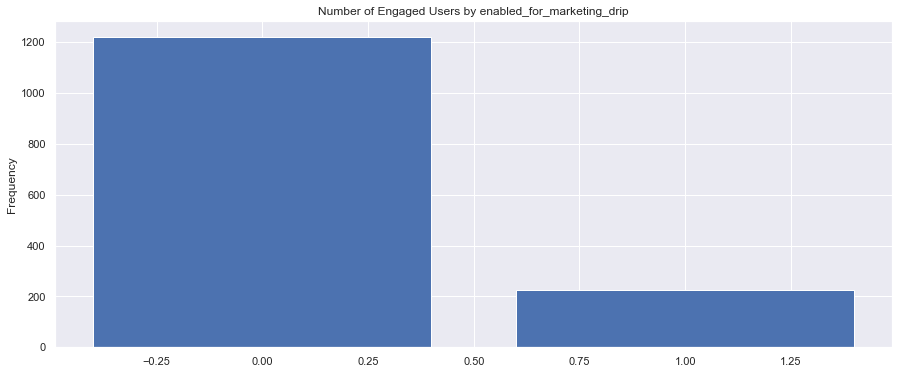

In [13]:
for col in group_by_cols:
    # plot mean of each category
    plt.figure(figsize=(15,6))
    plt.bar(users.groupby(col)['adopted'].mean().index, users.groupby(col)['adopted'].mean().values)
    plt.title('Percent of Engaged Users by {}'.format(col))
    plt.ylabel('Percent Engaged')
    plt.show()
    
    # plot count for each category
    plt.figure(figsize=(15,6))
    plt.bar(users.groupby(col)['adopted'].sum().index, users.groupby(col)['adopted'].sum().values)
    plt.title('Number of Engaged Users by {}'.format(col))
    plt.ylabel('Frequency')
    plt.show()

In [14]:
# add dummy variables for creation source to look at correlation to adoption, drop original creation_source column
users = pd.concat([users.drop('creation_source', axis=1), pd.get_dummies(users.creation_source)], axis=1)

In [15]:
# get correlation for select features, remove adopted row from correlation (because it is 1)
corr = users.drop(['object_id', 'org_id', 'invited_by_user_id', 'last_session_creation_time'], 
                  axis=1).corr().drop('adopted')

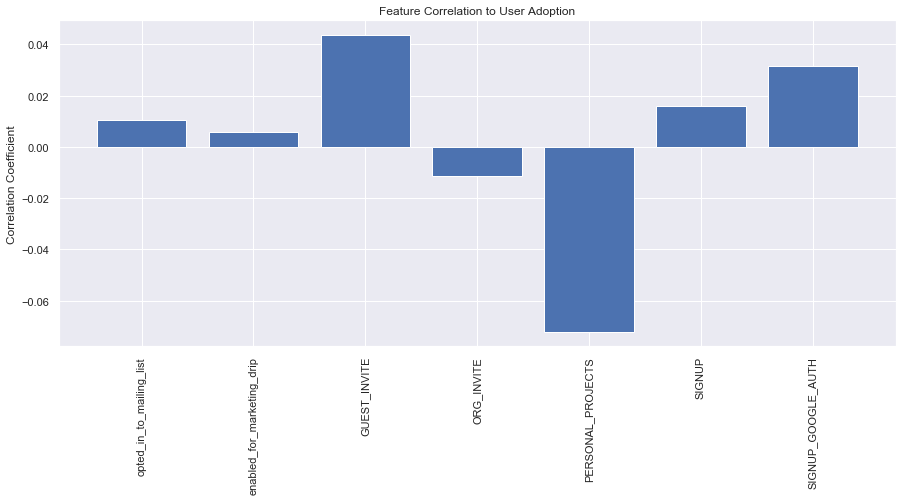

In [16]:
# plot feature correlation for the selected features
plt.figure(figsize=(15,6))
plt.bar(corr.adopted.index, corr.adopted.values)
plt.title('Feature Correlation to User Adoption')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.show()

From the correlation plot and the group by plots, it is clear that users who are invited by guests and users who sign up using Google authentication have the highest adoption rate. It is interesting to note that the personal project category has a high negative correlation to adoption. Not surprisingly, users who opted in to the mailing list or are enabled for marketing drip are more likely to adopt the system than not.